In [1]:
## Class 8 Exercise: Predicting Survival on the Titanic

This assignment uses data from Kaggle's [Titanic](https://www.kaggle.com/c/titanic/data) competition. `titanic.csv` is in the repo, so there is no need to download the data from the Kaggle website.

**Tasks:**

1. Read `titanic.csv` into a DataFrame.
2. Define Pclass and Parch as the features, and Survived as the response.
3. Split the data into training and testing sets. (Hint: use the train test split modules from sklearn)
4. Fit a logistic regression model and examine the coefficients to confirm that they make intuitive sense.
5. Make predictions on the testing set and calculate the accuracy.
7. Create a confusion matrix and document the model's sensitivity and specificity. (remember you should run metrics on your test classes!)
8. **Bonus:** Add Age as a feature, and calculate the testing accuracy. There will be a small issue you'll have to deal with. What is it?

Always remember to fit your model on the training data and run metrics on the test set.

SyntaxError: invalid syntax (<ipython-input-1-96f90b066444>, line 3)

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic = pd.read_csv('../data/titanic.csv',)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


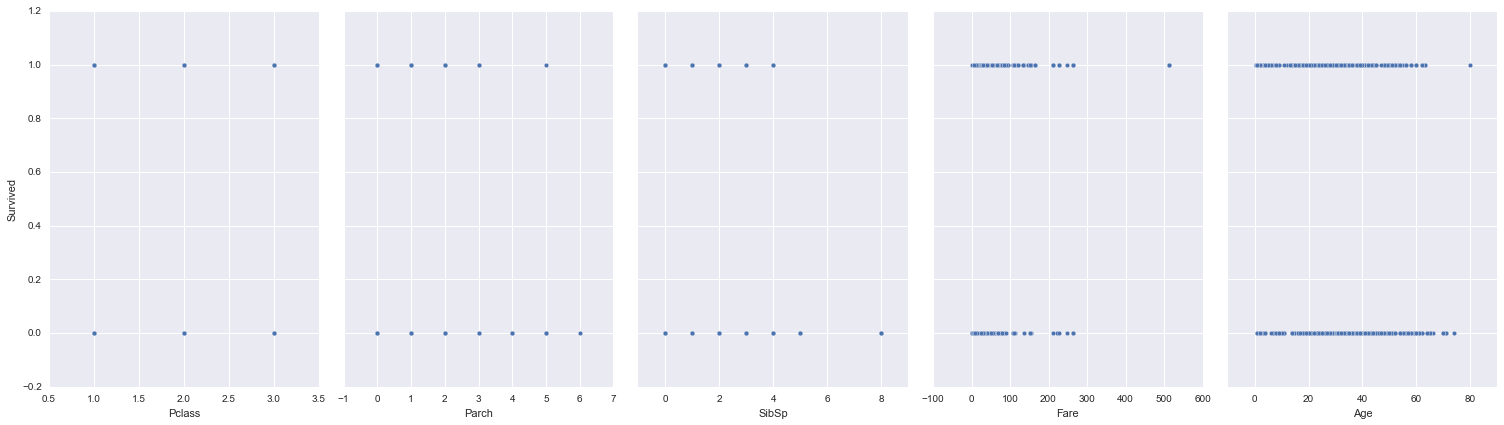

In [4]:
# 2. Define Pclass and Parch as the features, and Survived as the response.
features = ['Pclass','Parch'] # features
target = ['Survived'] # reponse
sex = titanic.Sex # make binary
ismale = np.where(sex == 'male',1,0)
titanic['ismale'] = ismale

# Age is missing columns. Could fill with average? 
# new column ideas:
# is married = f(age, sibsp)
# careful with fare. Could be correlated to class (dependent)
# Look for common last names in columns (families).
# look for religious names in columns. 

sns.pairplot(titanic, x_vars=['Pclass','Parch','SibSp','Fare','Age'], y_vars='Survived', size=6, aspect=0.7)


In [5]:
# 3. Split the data into training and testing sets. (Hint: use the train test split modules from sklearn)
X = titanic[features]
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# 4. Fit a logistic regression model and examine the coefficients to confirm that they make intuitive sense.

logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
print zip(features,logreg.coef_[0])

assorted_pred_class = logreg.predict(X_train)
print logreg.intercept_
print logreg.coef_
assorted_pred_class

[('Pclass', -0.88188860564509608), ('Parch', 0.3423921585749839)]
[ 1.32351595]
[[-0.88188861  0.34239216]]


array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0,

In [7]:
# 5. Make predictions on the testing set and calculate the accuracy.

print logreg.predict_proba([3,0])

logodds = logreg.intercept_ + logreg.coef_ * (X_train)
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

logreg.predict_proba(X_test)[:, 1]

# assorted_pred_prob = logreg.predict_proba(X)[:, 1]
# plt.scatter(titanic.Pclass, titanic.Survived)
# plt.plot(titanic.Pclass, assorted_pred_prob, color='red')


# from sklearn import metrics
# preds = logreg.predict(X)
# print metrics.confusion_matrix(y, preds)

[[ 0.78953917  0.21046083]]


/Users/mcullen/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.60864673,  0.21046083,  0.39167872,  0.21046083,  0.56082798,
        0.21046083,  0.56082798,  0.60864673,  0.60864673,  0.21046083,
        0.21046083,  0.21046083,  0.60864673,  0.39167872,  0.21046083,
        0.60864673,  0.3458423 ,  0.21046083,  0.21046083,  0.64265704,
        0.21046083,  0.21046083,  0.60864673,  0.39167872,  0.21046083,
        0.21046083,  0.75517608,  0.39167872,  0.39167872,  0.60864673,
        0.21046083,  0.60864673,  0.59623718,  0.21046083,  0.21046083,
        0.3458423 ,  0.60864673,  0.21046083,  0.60864673,  0.21046083,
        0.21046083,  0.3458423 ,  0.68654576,  0.60864673,  0.56082798,
        0.21046083,  0.3458423 ,  0.39167872,  0.60864673,  0.39167872,
        0.39167872,  0.39167872,  0.39167872,  0.39167872,  0.21046083,
        0.21046083,  0.39167872,  0.60864673,  0.59623718,  0.21046083,
        0.3458423 ,  0.21046083,  0.47555224,  0.60864673,  0.60864673,
        0.3458423 ,  0.27293986,  0.21046083,  0.27293986,  0.47

In [8]:
# defining a function to interrpret a confusion matrix
#  TODO: need to learn how to return deimal places
def inter_conf_matix(conf_matrix): 
    tn = conf_matrix[0,0]
    fn = conf_matrix[0,1]
    fp = conf_matrix[1,0]
    tp = conf_matrix[1,1]
    tot = tn + fn + tp + fp
    acc = (tn + tp) / (tot)
    sensi = tp / (fp + tp)
    speci = tn / (tn + fn)
    return [acc, sensi, speci]
    
# [[157   6]
#  [ 23  28]]
##Top Left: True Negatives 
##Top Right False Negatives 
##Bottom Left: False Negatives 
##Bottom Right: True Positives 
# Accuracy = (157 + 28) / 214 == .8644
# Sensitivity = 28 / (23 + 28) == .5490
# Specificity = 157 / (157 + 6) == .9631

In [9]:
from sklearn import metrics
print 'Training Set:'
conf_train = metrics.confusion_matrix(y_train, assorted_pred_class)
print conf_train
# [acc, sensi, speci] = inter_conf_matix(conf_train)
# print acc

print 'Testing Set'
preds = logreg.predict(X_test)
print metrics.confusion_matrix(y_test, preds)


Training Set:
[[353  68]
 [139 108]]
Testing Set
[[105  23]
 [ 51  44]]


In [10]:
# 7. Create a confusion matrix and document the model's sensitivity and specificity. (remember you should run metrics on your test classes!)

# Accuracy = (105 + 44) / 223  == .6682
# Sensitivity = 44 / (51 + 44) == .46316
# Specificity = 105 / (105 + 23) == .82031

In [11]:
# 8. **Bonus:** Add Age as a feature, and calculate the testing accuracy. There will be a small issue you'll have to deal with. What is it?

# making age an integer to use. 
Age = titanic['Age']
Age = np.array(Age)
age = Age.astype(int)
titanic['age_int'] = age

features = ['Pclass','Parch','age_int'] # features
target = ['Survived'] # reponse
X = titanic[features]
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
print zip(features,logreg.coef_[0])

assorted_pred_class = logreg.predict(X_test)
print logreg.intercept_
print logreg.coef_
assorted_pred_class

print 'Testing Set'
preds = logreg.predict(X_test)
print metrics.confusion_matrix(y_test, preds)

[('Pclass', -2.9443746665205775e-37), ('Parch', 1.0016413346671532e-39), ('age_int', 1.0337109742757591e-19)]
[ -8.14316160e-38]
[[ -2.94437467e-37   1.00164133e-39   1.03371097e-19]]
Testing Set
[[29 99]
 [16 79]]


In [ ]:
# Accuracy = (29 + 79) / 223  == .48430
# Sensitivity = 79 / (16 + 79) == .83158
# Specificity = 29 / (29 + 99) == .22656